<center><img src="https://img.freepik.com/free-vector/bank-credit-finance-management-loan-agreement-signing-mortgage-money-credit_335657-3136.jpg?w=826&t=st=1653911422~exp=1653912022~hmac=0f4ff8a8a443e542f79b51f8a572e5d9cf2d39e6eca18b749419db75be96c4c9" width="700" height="400"></center>

<b><h2><center>Delinquent Analysis Case Study</center></h2></b>

#Business Context

DRS bank is facing challenging times. Their NPAs (Non-Performing Assets) have been on a rise recently and a large part of these are due to the loans given to individual customers(borrowers). The Chief Risk Officer of the bank decides to put in a scientifically robust framework for approval of loans to individual customers to minimize the risk of loans converting into NPAs and initiates a project for the data science team at the bank. You, as a senior member of the team, are assigned this project.

# Objective
The data-set aims to answer the following key questions:

To identify the criteria to approve loans for an individual customer such that the likelihood of the loan delinquency is minimized?
What are the factors that drive the behavior of loan delinquency?

# Data Dictionary
The data contains characteristics of the people

- ID: Customer ID

- isDelinquent : indicates whether the customer is delinquent or not (1 => Yes, 0 => No)

- term: Loan term in months

- gender: Gender of the borrower

- age: Age of the borrower

- purpose: Purpose of Loan

- home_ownership: Status of borrower's home

- FICO: FICO (i.e. the bureau score) of the borrower

# Domain Information
- Transactor – A person who pays his due amount balance full and on time.

- Revolver – A person who pays the minimum due amount but keeps revolving his balance and does not pay the full amount.

- Delinquent - Delinquency means that you are behind on payments, a person who fails to pay even the minimum due amount.

- Defaulter – Once you are delinquent for a certain period your lender will declare you to be in the default stage.

- Risk Analytics – A wide domain in the financial and banking industry, basically analyzing the risk of the customer.

-------------------------------------------------------

In [3]:
#Libraries to suppress warning or depreciation notes
import warnings
warnings.filterwarnings("ignore")

#Libraries to manipulate data
import pandas as pd
import numpy as np

#Library to split data
from sklearn.model_selection import train_test_split

#Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To perform statistical analysis
import scipy.stats as stats

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    make_scorer,
)



# Load in the data

In [4]:
df = pd.read_csv('Loan_Delinquent_Dataset.csv')

In [5]:
# Copy data to another variable to avoid changes to original dataset
loan = df.copy()

# Overview of the Data

In [6]:
# Top rows
loan.head()

,ID,isDelinquent,term,gender,purpose,home_ownership,age,FICO
0,1,1,36 months,Female,House,Mortgage,>25,300-500
1,2,0,36 months,Female,House,Rent,20-25,>500
2,3,1,36 months,Female,House,Rent,>25,300-500
3,4,1,36 months,Female,Car,Mortgage,>25,300-500
4,5,1,36 months,Female,House,Rent,>25,300-500


In [7]:
# Bottom rows
loan.tail()

,ID,isDelinquent,term,gender,purpose,home_ownership,age,FICO
11543,11544,0,60 months,Male,other,Mortgage,>25,300-500
11544,11545,1,36 months,Male,House,Rent,20-25,300-500
11545,11546,0,36 months,Female,Personal,Mortgage,20-25,>500
11546,11547,1,36 months,Female,House,Rent,20-25,300-500
11547,11548,1,36 months,Male,Personal,Mortgage,20-25,300-500


#Shape of data set

In [8]:
#Shape
loan.shape

(11548, 8)

The dataset has 11548 rows and 8 columns

In [9]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11548 entries, 0 to 11547
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              11548 non-null  int64 
 1   isDelinquent    11548 non-null  int64 
 2   term            11548 non-null  object
 3   gender          11548 non-null  object
 4   purpose         11548 non-null  object
 5   home_ownership  11548 non-null  object
 6   age             11548 non-null  object
 7   FICO            11548 non-null  object
dtypes: int64(2), object(6)
memory usage: 721.9+ KB


Observations

- isDelinquent is the dependent variable - type integer

- All the indepepent variables except for ID are object type

- No missing values


In [10]:
# Summary of Dataset
loan.describe()

,ID,isDelinquent
count,11548.000000,11548.000000
mean,5774.500000,0.668601
std,3333.764789,0.470737
min,1.000000,0.000000
25%,2887.750000,0.000000
50%,5774.500000,1.000000
75%,8661.250000,1.000000
max,11548.000000,1.000000


In [11]:
#Numeric & categorical summary
loan.describe(include='all')

,ID,isDelinquent,term,gender,purpose,home_ownership,age,FICO
count,11548.000000,11548.000000,11548,11548,11548,11548,11548,11548
unique,NaN,NaN,2,2,7,3,2,2
top,NaN,NaN,36 months,Male,House,Mortgage,20-25,300-500
freq,NaN,NaN,10589,6555,6892,5461,5888,6370
mean,5774.500000,0.668601,NaN,NaN,NaN,NaN,NaN,NaN
std,3333.764789,0.470737,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,2887.750000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,5774.500000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,8661.250000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN


Observations

- Most common term is 36 months
- Higest count gender is male
- Most common purpose is house
- Common age range is 20-25
- Common FICO score is between 300-500
- Most common is Mortgage for financing option

----------------------------------------------------

# Check for missing values & Duplicates

In [12]:
# is null
loan.isnull().sum()

ID                0
isDelinquent      0
term              0
gender            0
purpose           0
home_ownership    0
age               0
FICO              0
dtype: int64

In [13]:
# Duplicates
loan.duplicated().sum()

0

- No missing values or duplicates in the dataset

# Steps
 - Check columns which can be dropped
 - Univariate analysis (numeric and/or categorical)
 - Bivariate analysis (numeric and/or categorical)
 - Data Preprocessing
 - Model Building
 - Comparison of models and final selection
 - Conclusion & recommendation


# Drop Columns

- Which columns will not be needed for the analysis?

In [14]:
loan.head()

,ID,isDelinquent,term,gender,purpose,home_ownership,age,FICO
0,1,1,36 months,Female,House,Mortgage,>25,300-500
1,2,0,36 months,Female,House,Rent,20-25,>500
2,3,1,36 months,Female,House,Rent,>25,300-500
3,4,1,36 months,Female,Car,Mortgage,>25,300-500
4,5,1,36 months,Female,House,Rent,>25,300-500


In [15]:
# ID column
loan['ID'].nunique()

11548

- Since all the values are unique it can be dropped

# Exploratory Data Analysis (EDA)

- Create function for labeled barplot
- Create function for stacked barplot

In [16]:
# Function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    '''
    Barplot with percentage at the top

    Data: dataframa
    Feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n categories levels (default is None. i.e., display all levels)

    '''
    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [17]:
#Function to create labeled stack bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

# Univariate Analysis

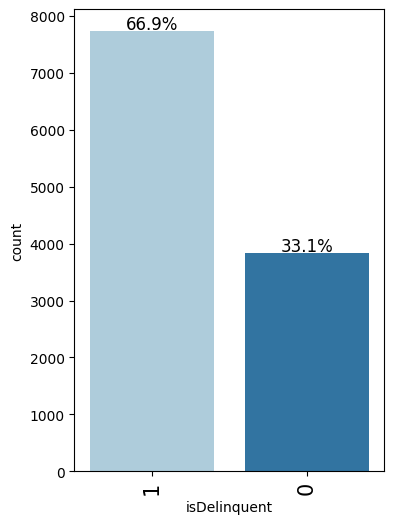

In [18]:
# Observation isDelinquent
labeled_barplot(loan, 'isDelinquent', perc=True)

- 66.9% of customers are delinquent (Just under 8,000 customers)

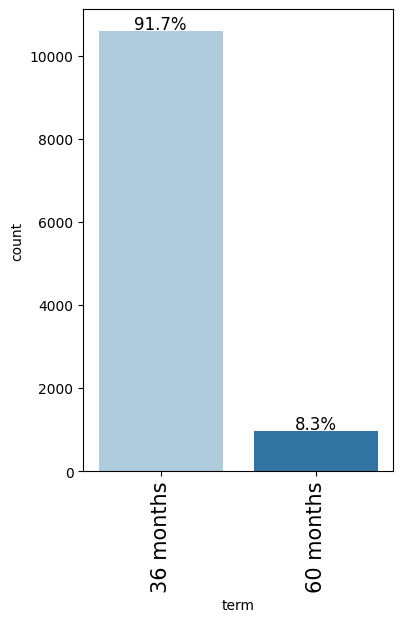

In [19]:
# Observation term
labeled_barplot(loan, 'term', perc= True)

- 91.7% of customers are on a 36 month term
- 8.3% on a 60 months term

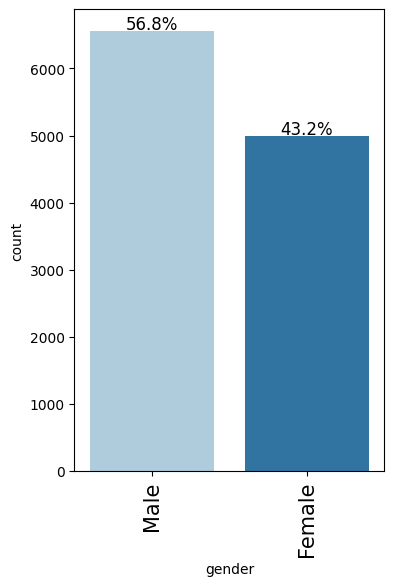

In [20]:
# Observation on Gender
labeled_barplot(loan, 'gender', perc=True)

- 56.8% are males applicants
- 43.2% are females applicants

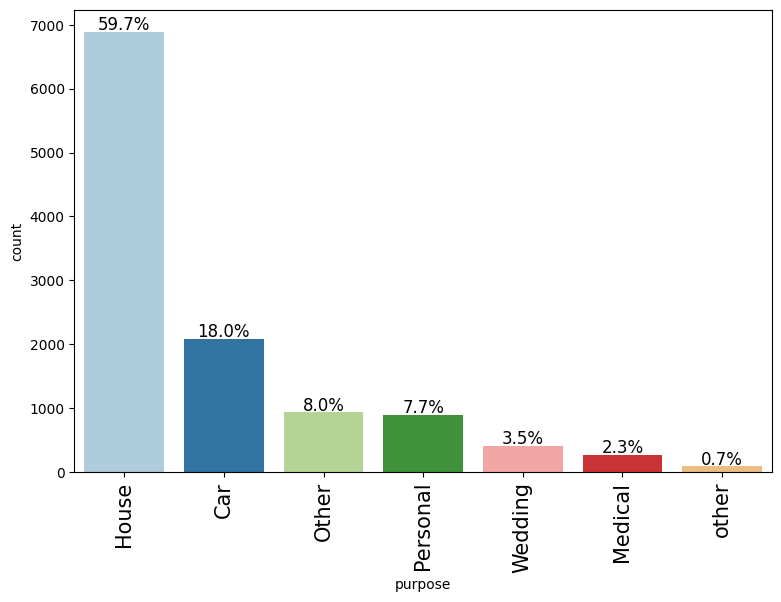

In [21]:
#Observation on purpose
labeled_barplot(loan, 'purpose', perc=True)

- House is the majority with 59.7%
- Car is 18%
- Two columns are 'Other' & 'other'. will investigate and merge if same.   

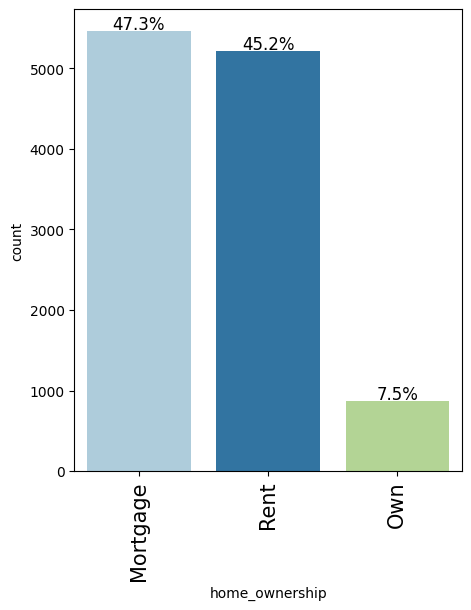

In [23]:
# Observation of home ownership
labeled_barplot(loan, 'home_ownership', perc=True)

- Mortgage is the majority with 47.3% and rent with 45.2%
- Own makes up only 7.5%


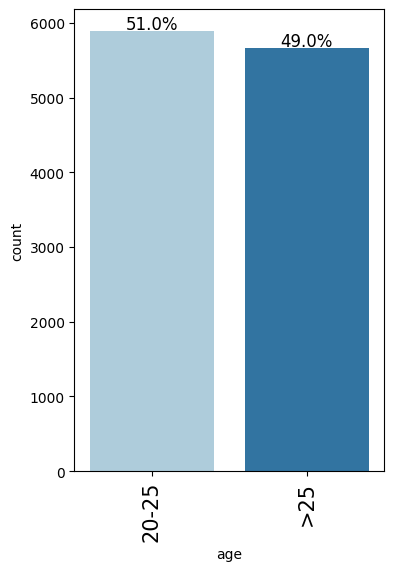

In [25]:
# Observation for age
labeled_barplot(loan,'age', perc = True)

- 20-25 age range makes the majority with 51% but over 25 age being 49%.


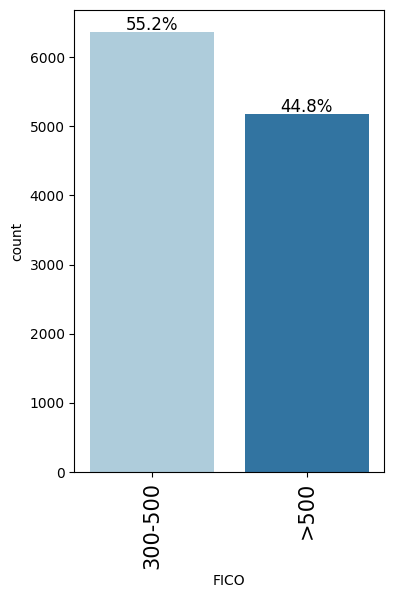

In [26]:
# Observation for FICO
labeled_barplot(loan, 'FICO', perc = True)

- Majority have a fico score of 300-500 (Poor to Fair according to banks score)
- 44.8% have a 500 range score  (Fair to exceptional)


-------------------------------------------------------------------------------

# Data Cleaning

'Other' and 'other' in the purpose column showed no difference between the two variables and can be merged  

In [31]:
# Review purpose rows unique
loan['purpose'].unique()

array(['House', 'Car', 'Other', 'Personal', 'Wedding', 'Medical', 'other'],
      dtype=object)

In [32]:
# Replace other with Others
loan["purpose"].replace("other", "Other", inplace=True)

In [33]:
# Check changes
loan['purpose'].unique()

array(['House', 'Car', 'Other', 'Personal', 'Wedding', 'Medical'],
      dtype=object)

# Bivariate Analysis